In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df= pd.read_csv('HW.csv')

In [73]:
df.head()

,STUDENTS,WEIGHT,HEIGHT
0,1,188,85
1,2,169,50
2,3,178,64
3,4,180,93
4,5,178,90


In [75]:
df.tail()

,STUDENTS,WEIGHT,HEIGHT
5,6,167,74
6,7,172,55
7,8,190,77
8,9,169,63
9,10,167,59


In [77]:
plt.scatter(df['WEIGHT'],df['HEIGHT'])
plt.xlabel("Weight")
plt.ylabel("Height")

Text(0, 0.5, 'Height')

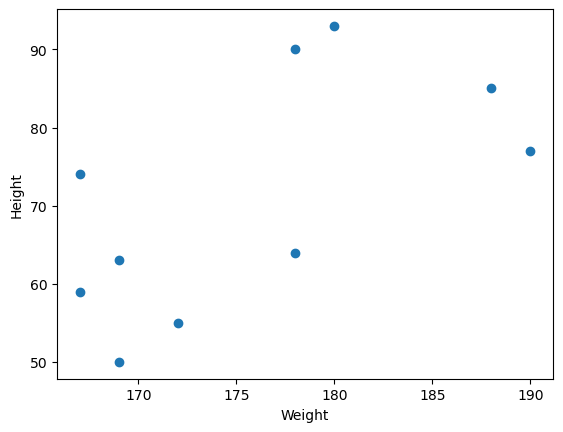

In [79]:
plt.show()

In [81]:
## divide the features into independent and dependent features 
X = df[['WEIGHT']]
y = df['HEIGHT']


In [83]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [85]:
X_train , X_test, y_train, y_test = train_test_split(X, y , random_state = 42, test_size = 0.20)

In [87]:
X.shape

(10, 1)

In [89]:
X_train.shape , X_test.shape

((8, 1), (2, 1))

In [91]:
y_train.shape , y_test.shape

((8,), (2,))

In [93]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()

In [97]:
X_train = scaler.fit_transform(X_train) ## in fit transorm we are applying Z scores on every datapoint on it.

In [99]:
X_test = scaler.transform(X_test)

In [101]:
plt.scatter(X_train , y_train)

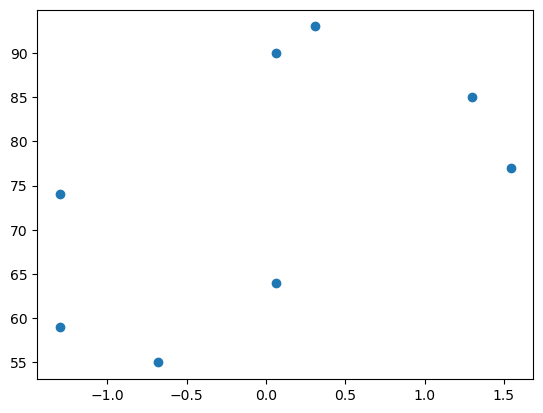

In [103]:
plt.show()

In [105]:
## Train Our Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [111]:
regressor = LinearRegression()

In [113]:
regressor.fit(X_train,y_train)

LinearRegression()

In [133]:
print("The slope or the coeffiecient of Weight",regressor.coef_) ## coeffiecnt = slope here where we have the independent feature is one.

The slope or the coeffiecient of Weight [7.18967151]


In [135]:
print("The Intercept:" , regressor.intercept_)

The Intercept: 74.625


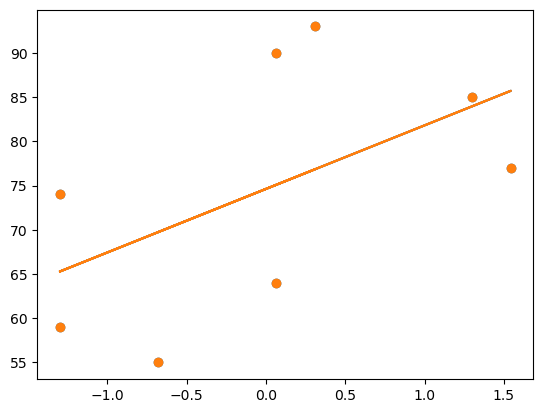

In [145]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train))
plt.show()

Prediction of Train Data
1. Prediction height output = intercept + coef_(Weights)
2. y_pred_train = 74.625 + 7.18(X_train)

Prediction of Test Data 
1. Prediction height output = intercept + coef_(Weights)
2. y_pred_test = 74.625 + 7.18(X_test)

In [151]:
y_pred_test = regressor.predict(X_test)

In [153]:
y_pred_test , y_test

(array([67.07395038, 67.07395038]),
 8    63
 1    50
 Name: HEIGHT, dtype: int64)

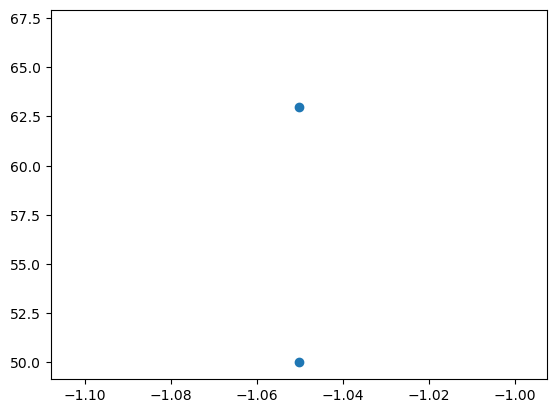

In [157]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test))
plt.show()

Performance Metrices
MAE , MSE , RMSE
R square and adjusted R square 

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [161]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

154.05842667421783
10.573950381679396
12.41202750054228


In [163]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [165]:
score

-2.646353294064327

Adjusted R Square 
Adjusted R2 = 1 - [(1 - R2)*(n-1)/(n-k-1))]
R2 : The R2 of the model n : The number of observation k: The number of predictor variables

In [167]:
regressor

LinearRegression()

In [169]:
## new data point weight is 80 
scaled_weight = scaler.transform([[80]])
scaled_weight


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-12.04714023]])

In [171]:
regressor.predict([scaled_weight[0]])

array([-11.98998092])

In [173]:
print("The Height prediction for the weight 80 kg is" , regressor.predict([scaled_weight[0]]))

The Height prediction for the weight 80 kg is [-11.98998092]


In [175]:
## Residuals
residuals = y_test - y_pred_test
residuals

8    -4.07395
1   -17.07395
Name: HEIGHT, dtype: float64